In [2]:
import numpy as np
import sklearn
import keras
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\kabil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [114]:
# Indicate path to dataset
DATA_PATH = 'mnistData.npz'
#DATA_PATH = 'fashion_mnist_Data.npz'

# Load files
npzfile = np.load(DATA_PATH)
npzfile.files

['X_train', 'y_train', 'X_test', 'y_test']

In [115]:
X_train, y_train = npzfile['X_train'], npzfile['y_train']
X_test, y_test = npzfile['X_test'], npzfile['y_test']

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


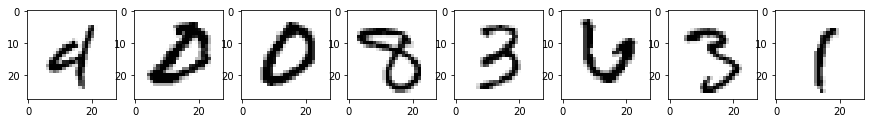

In [116]:
N_2_SHOW = 8

# Take a random set of indeces
rng = np.random.RandomState(seed=42)
imgIndeces = rng.randint(0, len(X_train), size=N_2_SHOW)

# Show images
plt.figure(figsize=(15,3))
for i, imgIdx in enumerate(imgIndeces):
    # get current image
    curImg = X_train[imgIdx]
    
    # show image
    plt.subplot(1,N_2_SHOW,(i+1))
    plt.imshow(curImg, cmap='gray_r')

plt.show()

del N_2_SHOW, rng

In [117]:
def noisify(img, scale=0.38):
    noise = np.abs(np.random.normal(scale=scale, size=img.shape))
    noisy_img = noise + img
    noisy_img = noisy_img/(np.max(noisy_img))
    return noisy_img

In [118]:
def noisify_n(imgs, scale=0.38):
    noisy_imgs = np.zeros(imgs.shape)
    for i in range(noisy_imgs.shape[0]):
        noisy_imgs[i] = noisify(imgs[i], scale=scale)
    return noisy_imgs

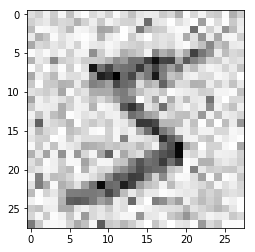

In [119]:
plt.imshow(noisify(X_train[0]), cmap="gray_r")
plt.show()
#noisify(X_train[0])

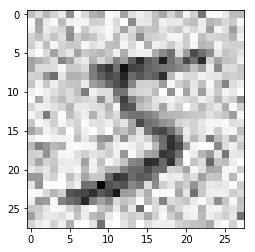

In [120]:
plt.imshow(noisify_n(X_train)[0], cmap="gray_r")
plt.show()

In [125]:
noisy_X_train = noisify_n(X_train, scale=0.14)
noisy_X_test = noisify_n(X_test, scale=0.14)
noisy_data = {"X_train": noisy_X_train, "y_train": y_train, "X_test": noisy_X_test, "y_test": y_test}

In [126]:
SAVE_PATH = "mnist_noisy_Data_0_14.npz"

np.savez(SAVE_PATH, X_train=noisy_X_train, y_train=y_train, X_test=noisy_X_test, y_test=y_test)

In [3]:
d1 = np.load("mnist_noisy_Data_0_38.npz", encoding="ASCII")
d2 = np.load("mnist_noisy_Data_0_3.npz", encoding="ASCII")
d3 = np.load("mnist_noisy_Data_0_22.npz", encoding="ASCII")
d4 = np.load("mnist_noisy_Data_0_14.npz", encoding="ASCII")

In [6]:
x1 = d1["X_test"]
x2 = d2["X_test"]
x3 = d3["X_test"]
x4 = d4["X_test"]

In [7]:
np.savez("mnist_noisy_Data_0_38_test.npz", X_test=x1)
np.savez("mnist_noisy_Data_0_3_test.npz", X_test=x2)
np.savez("mnist_noisy_Data_0_22_test.npz", X_test=x3)
np.savez("mnist_noisy_Data_0_14_test.npz", X_test=x4)

In [4]:
y1 = d1["y_test"]
y2 = d2["y_test"]
y3 = d3["y_test"]
y4 = d4["y_test"]

In [5]:
np.savez("mnist_noisy_Data_0_38_test_labels.npz", y_test=y1)
np.savez("mnist_noisy_Data_0_3_test_labels.npz", y_test=y2)
np.savez("mnist_noisy_Data_0_22_test_labels.npz", y_test=y3)
np.savez("mnist_noisy_Data_0_14_test_labels.npz", y_test=y4)

In [9]:
np.savez("mnist_noisy_Data_0_38_test_data.npz", X_test=x1, y_test=y1)
np.savez("mnist_noisy_Data_0_3_test_data.npz", X_test=x2, y_test=y2)
np.savez("mnist_noisy_Data_0_22_test_data.npz", X_test=x3, y_test=y3)
np.savez("mnist_noisy_Data_0_14_test_data.npz", X_test=x4, y_test=y4)

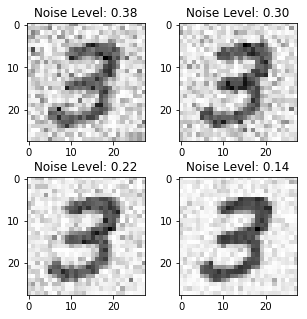

In [158]:
fig = plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.3)
sub1 = fig.add_subplot(2, 2, 1)
sub1.title.set_text("Noise Level: 0.38")
sub1.imshow(x1[7], cmap="gray_r")
sub2 = fig.add_subplot(2, 2, 2)
sub2.title.set_text("Noise Level: 0.30")
sub2.imshow(x2[7], cmap="gray_r")
sub3 = fig.add_subplot(2, 2, 3)
sub3.title.set_text("Noise Level: 0.22")
sub3.imshow(x3[7], cmap="gray_r")
sub4 = fig.add_subplot(2, 2, 4)
sub4.title.set_text("Noise Level: 0.14")
sub4.imshow(x4[7], cmap="gray_r")
plt.savefig("noisynoisy.png")
plt.show()

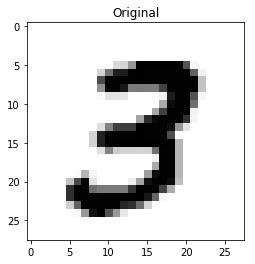

In [160]:
plt.imshow(X_train[7], cmap="gray_r")
plt.title("Original")
plt.savefig("original.png")